# API Data Wrangling with Open-Meteo

In this exercise, we will:

- Fetch historical weather data using the **Open-Meteo API**.
- Parse and clean the data using **pandas**.
- Perform exploratory data analysis.
- Visualize weather trends.

In [1]:
# Install required packages if not already installed
# !pip install requests pandas matplotlib --quiet

In [3]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

## Understand the Open-Meteo API

- **API Endpoint**: `https://archive-api.open-meteo.com/v1/archive`
- **Parameters**:
  - `latitude`: Latitude of the location.
  - `longitude`: Longitude of the location.
  - `start_date`: Start date of the data (YYYY-MM-DD).
  - `end_date`: End date of the data (YYYY-MM-DD).
  - `hourly`: Comma-separated list of variables (e.g., temperature, precipitation).
  - `timezone`: Timezone of the data.

**Documentation**: [Open-Meteo API Docs](https://open-meteo.com/en/docs)

In [5]:
# Step 1: Set Up Parameters

# Location coordinates for New York City
latitude = 40.7128
longitude = -74.0060

# Date range
start_date = '2023-01-01'
end_date = '2023-01-07'  # One week of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']


In [7]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/New_York'
}

response = requests.get(base_url, params=params)


In [9]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [11]:
# Step 3: Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df = pd.DataFrame(hourly_data)
df.head()


,time,temperature_2m,relativehumidity_2m,precipitation
0,2023-01-01T00:00,10.7,99,1.0
1,2023-01-01T01:00,10.5,99,1.0
2,2023-01-01T02:00,10.4,98,0.1
3,2023-01-01T03:00,10.3,96,0.0
4,2023-01-01T04:00,9.7,95,0.0


In [13]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Check for missing values
df.isnull().sum()


temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

In [15]:
# Handle missing values (if any)
df.ffill(inplace=True)  # Forward fill


/var/folders/v8/j1kjtws546j8drwljwyklgrm0000gn/T/ipykernel_23537/1928920962.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill


In [17]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,168.000000,168.000000,168.000000
mean,8.371429,86.422619,0.142857
std,3.495063,12.799933,0.436037
min,0.400000,45.000000,0.000000
25%,5.900000,81.000000,0.000000
50%,8.250000,90.500000,0.000000
75%,11.100000,97.000000,0.000000
max,17.900000,100.000000,3.100000


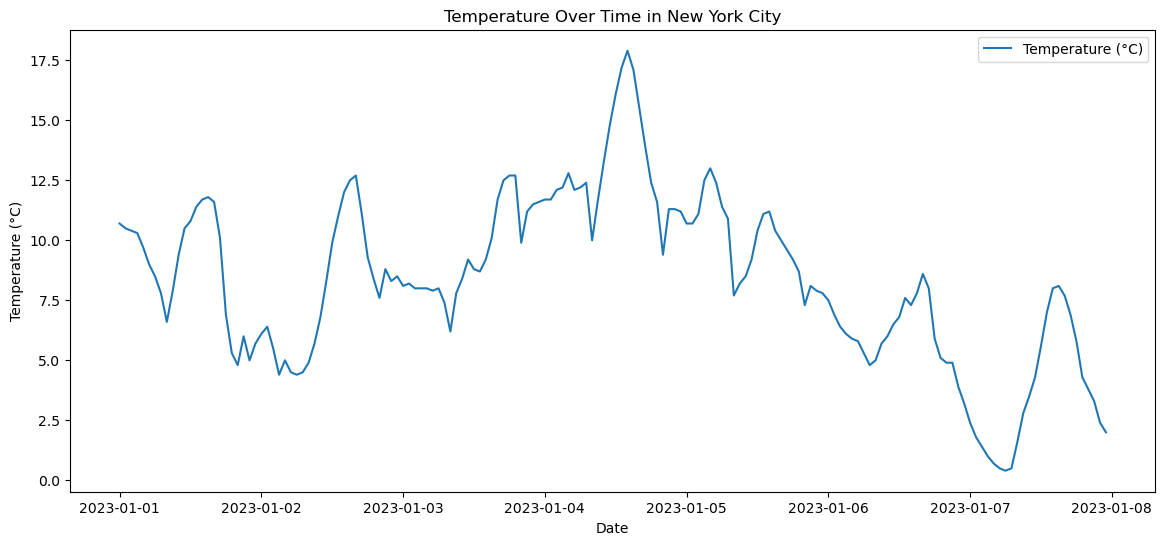

In [19]:
# Plot Temperature Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['temperature_2m'], label='Temperature (°C)')
plt.title('Temperature Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

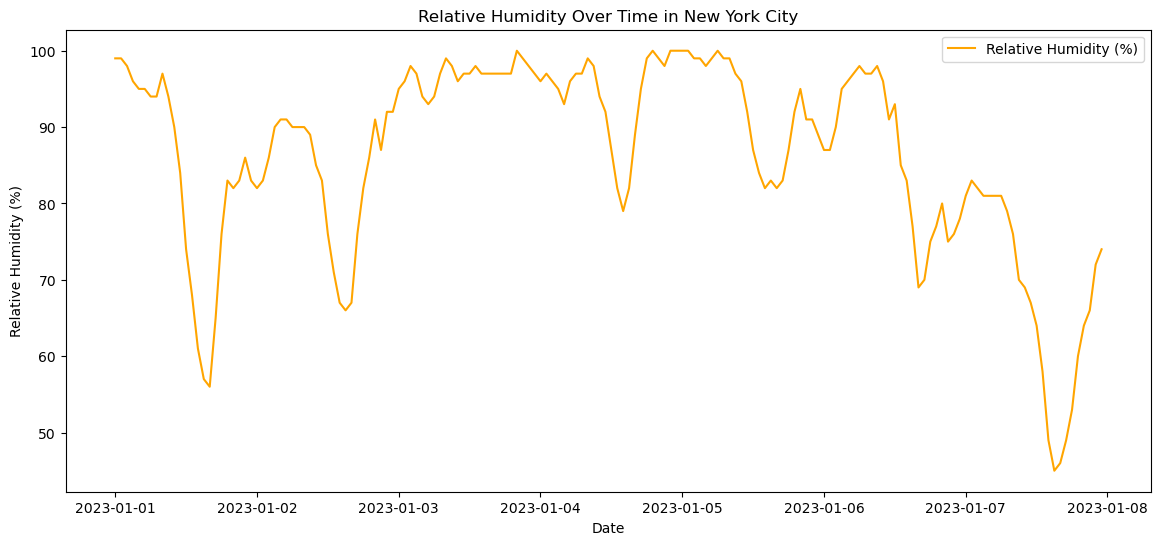

In [21]:
# Plot Relative Humidity Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['relativehumidity_2m'], color='orange', label='Relative Humidity (%)')
plt.title('Relative Humidity Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()


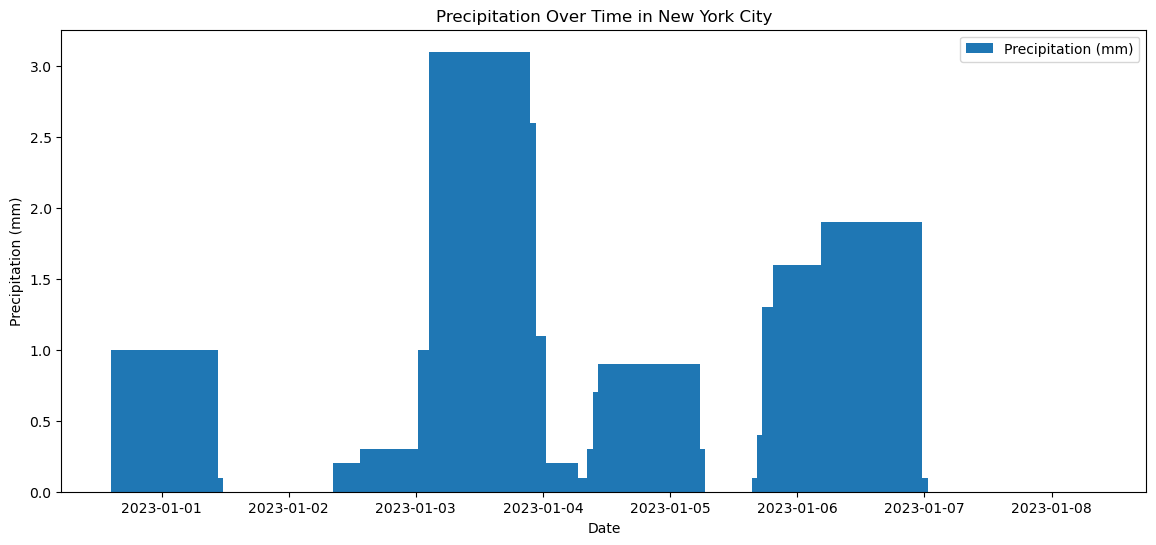

In [23]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df.index, df['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


In [25]:
# Step 6: Correlation Analysis

# Calculate correlation between temperature and humidity
correlation = df['temperature_2m'].corr(df['relativehumidity_2m'])
print(f'Correlation between Temperature and Relative Humidity: {correlation:.2f}')


Correlation between Temperature and Relative Humidity: 0.24


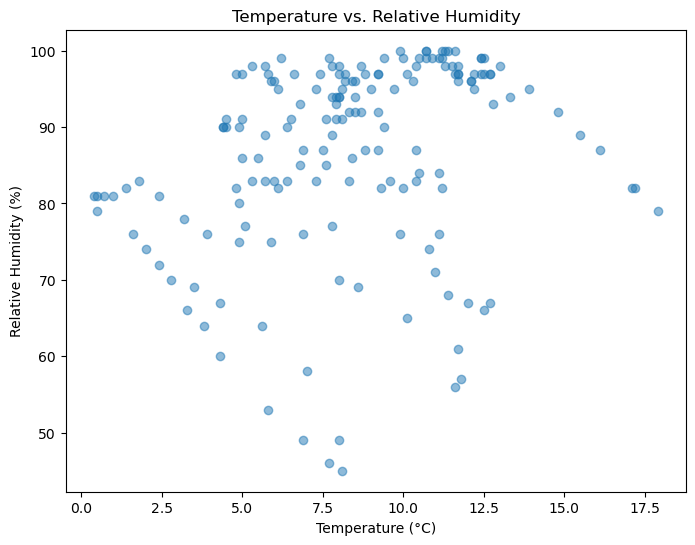

In [27]:
# Scatter Plot of Temperature vs. Relative Humidity

plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_2m'], df['relativehumidity_2m'], alpha=0.5)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


In [29]:
# Step 7: Resample Data to Daily Averages

daily_avg = df.resample('D').mean()
daily_avg.head()


,temperature_2m,relativehumidity_2m,precipitation
time,,,
2023-01-01,8.850000,83.708333,0.087500
2023-01-02,7.775000,83.458333,0.020833
2023-01-03,9.408333,96.875000,0.395833
2023-01-04,12.995833,94.166667,0.095833
2023-01-05,9.916667,92.666667,0.000000


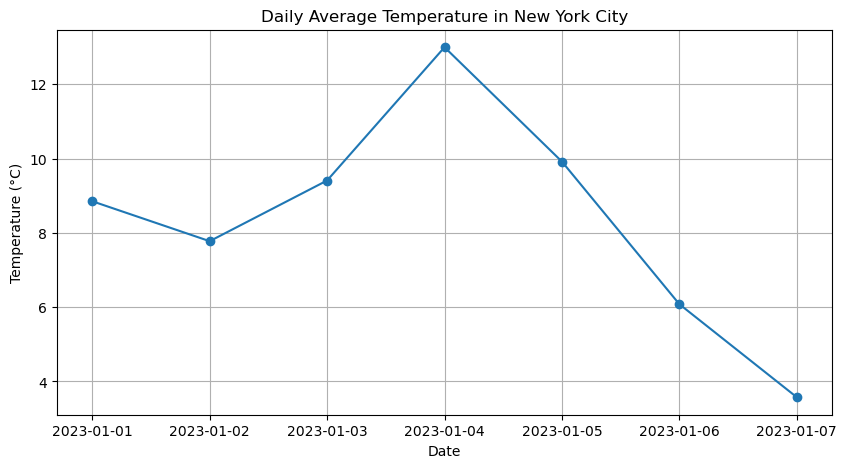

In [31]:
# Plot Daily Average Temperature

plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg['temperature_2m'], marker='o')
plt.title('Daily Average Temperature in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [171]:
# Step 8: Compare with Another Location (Los Angeles)

# Coordinates for Los Angeles
latitude_la = 34.0522
longitude_la = -118.2437

params_la = {
    'latitude': latitude_la,
    'longitude': longitude_la,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_la = requests.get(base_url, params=params_la)

# Load and clean Los Angeles data
data_la = response_la.json()
hourly_data_la = data_la['hourly']
df_la = pd.DataFrame(hourly_data_la)

df_la['time'] = pd.to_datetime(df_la['time'])
df_la.set_index('time', inplace=True)
df_la.ffill(inplace=True)


In [35]:
# Resample Los Angeles Data to Daily Averages

daily_avg_la = df_la.resample('D').mean()


In [37]:
# Combine DataFrames for Comparison

combined_temp = pd.DataFrame({
    'New York': daily_avg['temperature_2m'],
    'Los Angeles': daily_avg_la['temperature_2m']
})


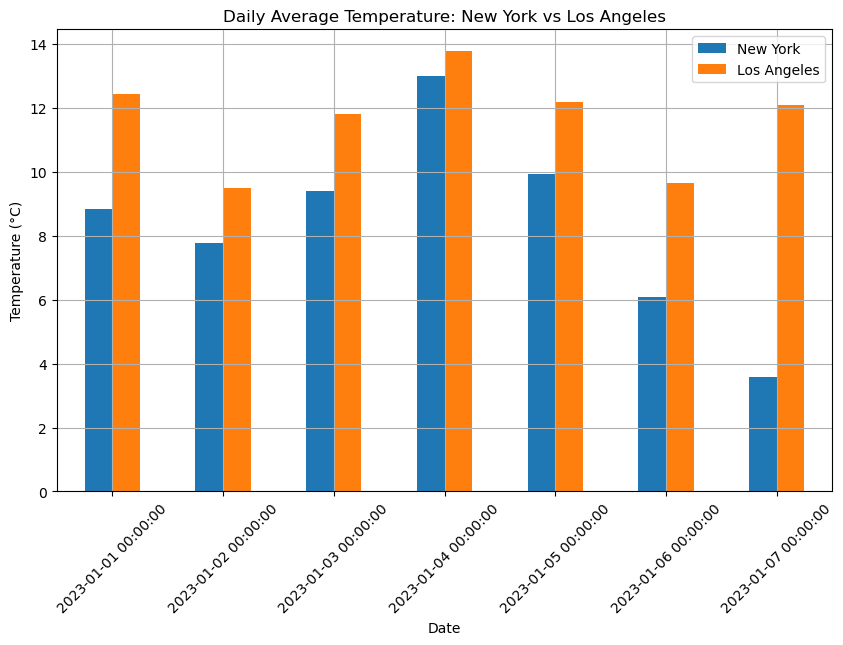

In [39]:
# Plot Comparison of Daily Average Temperature

combined_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Daily Average Temperature: New York vs Los Angeles')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [41]:
# Step 9: Advanced Analysis - Temperature Difference

# Calculate Temperature Difference
combined_temp['Temp Difference'] = combined_temp['Los Angeles'] - combined_temp['New York']
combined_temp


,New York,Los Angeles,Temp Difference
time,,,
2023-01-01,8.850000,12.433333,3.583333
2023-01-02,7.775000,9.483333,1.708333
2023-01-03,9.408333,11.808333,2.400000
2023-01-04,12.995833,13.766667,0.770833
2023-01-05,9.916667,12.183333,2.266667
2023-01-06,6.079167,9.662500,3.583333
2023-01-07,3.575000,12.095833,8.520833


In [43]:
# Step 10: Save Data to CSV (Optional)

# Save New York data
df.to_csv('new_york_weather.csv')

# Save Los Angeles data
df_la.to_csv('los_angeles_weather.csv')


## Conclusion

In this exercise, we:

- Accessed and retrieved data from the **Open-Meteo API**.
- Cleaned and preprocessed JSON data using **pandas**.
- Performed exploratory data analysis and visualization.
- Compared weather patterns between **New York City** and **Los Angeles**.

---

**Next Steps**:

- **Extend the Date Range**: Analyze seasonal trends by fetching data over several months.
- **Fetch Additional Variables**: Include wind speed, atmospheric pressure, or other interesting variables.
- **Forecasting**: Use statistical methods or machine learning models to forecast future weather patterns.
- **Global Analysis**: Compare data from other global cities to gain broader insights.


## Exercises for Students

Now it's your turn! Below are some exercises to reinforce what you've learned. Try to complete them without looking at the solutions.

### Exercise: Compare Rainfall Between London and Seattle

- **Objective**: Compare the total weekly rainfall between London and Seattle over a full year.
- **Tasks**:
  1. **Fetch Data**: Retrieve hourly precipitation data for London and Seattle for the year 2022.
     - **London Coordinates**: Latitude `51.5074`, Longitude `-0.1278`
     - **Seattle Coordinates**: Latitude `47.6062`, Longitude `-122.3321`
  2. **Data Cleaning**: Convert the time columns to datetime objects and set them as the index. Handle any missing values.
  3. **Resample Data**: Resample the hourly data to weekly totals.
  4. **Visualization**: Plot the weekly total precipitation for both cities on the same graph.
  5. **Analysis**: Determine which city had more rainfall overall and identify any interesting patterns.

**Note**: Remember to handle any API limitations, such as data availability or rate limits, and to be mindful of the size of the data you're requesting.

### Tips:

- **API Parameters**: Make sure to adjust the parameters like `latitude`, `longitude`, `start_date`, `end_date`, `hourly`, and `timezone` as needed.
- **Error Handling**: Always check if your API requests are successful before proceeding.
- **Data Storage**: Consider saving your DataFrames to CSV files for future analysis.
- **Visualization**: Customize your plots with titles, labels, legends, and gridlines for better readability.

Happy coding!


In [133]:
# Step 1: Set Up Parameters

# Location coordinates for London
latitude_ldn = 51.5074
longitude_ldn = -0.1278

# Date range
start_date_2 = '2022-01-01'
end_date_2 = '2022-12-31'  # One year of data

# Variables to fetch
hourly_variables_2 = ['temperature_2m', 'relativehumidity_2m', 'precipitation']

In [135]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params_2 = {
    'latitude': latitude_ldn,
    'longitude': longitude_ldn,
    'start_date': start_date_2,
    'end_date': end_date_2,
    'hourly': ','.join(hourly_variables_2),
    'timezone': 'Europe/London'
}

response_2 = requests.get(base_url, params=params_2)


In [137]:
# Check if the request was successful

if response_2.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response_2.status_code}')

Data fetched successfully!


In [139]:
# Step 3: Load Data into pandas DataFrame

data_2 = response_2.json()
hourly_data_2 = data_2['hourly']

df_2 = pd.DataFrame(hourly_data_2)
df_2.head()


,time,temperature_2m,relativehumidity_2m,precipitation
0,2022-01-01T00:00,12.7,93,0.0
1,2022-01-01T01:00,12.8,93,0.0
2,2022-01-01T02:00,12.5,93,0.0
3,2022-01-01T03:00,12.3,92,0.0
4,2022-01-01T04:00,11.9,93,0.0


In [141]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df_2['time'] = pd.to_datetime(df_2['time'])

# Set 'time' as the index
df_2.set_index('time', inplace=True)

# Check for missing values
df_2.isnull().sum()

temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

In [143]:
# Handle missing values (if any)
df_2.ffill(inplace=True)  # Forward fill

In [145]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df_2.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,8760.000000,8760.000000,8760.000000
mean,12.013014,76.635160,0.075696
std,6.651762,16.721898,0.404506
min,-5.400000,17.000000,0.000000
25%,7.400000,65.000000,0.000000
50%,11.900000,81.000000,0.000000
75%,16.400000,90.000000,0.000000
max,38.000000,100.000000,14.700000


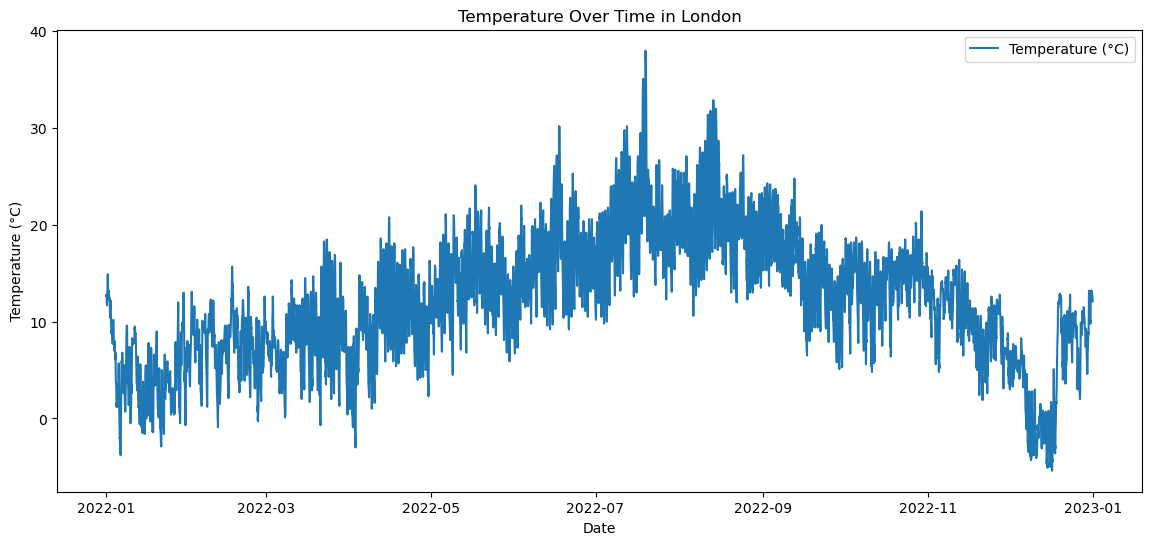

In [147]:
# Plot Temperature Over Time

plt.figure(figsize=(14, 6))
plt.plot(df_2.index, df_2['temperature_2m'], label='Temperature (°C)')
plt.title('Temperature Over Time in London')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

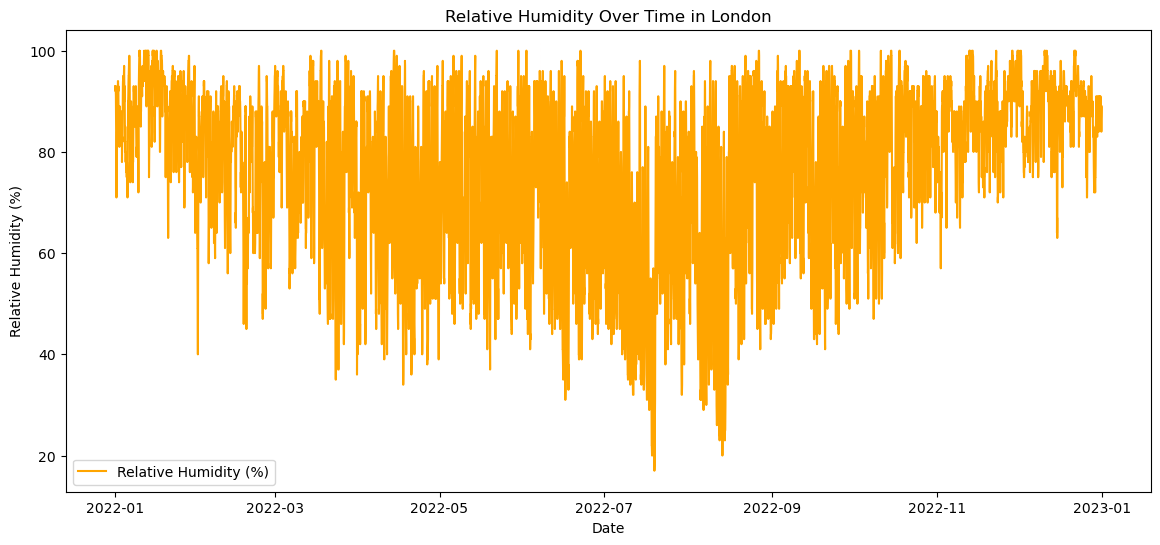

In [149]:
# Plot Relative Humidity Over Time

plt.figure(figsize=(14,6))
plt.plot(df_2.index, df_2['relativehumidity_2m'], color='orange', label='Relative Humidity (%)')
plt.title('Relative Humidity Over Time in London')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()

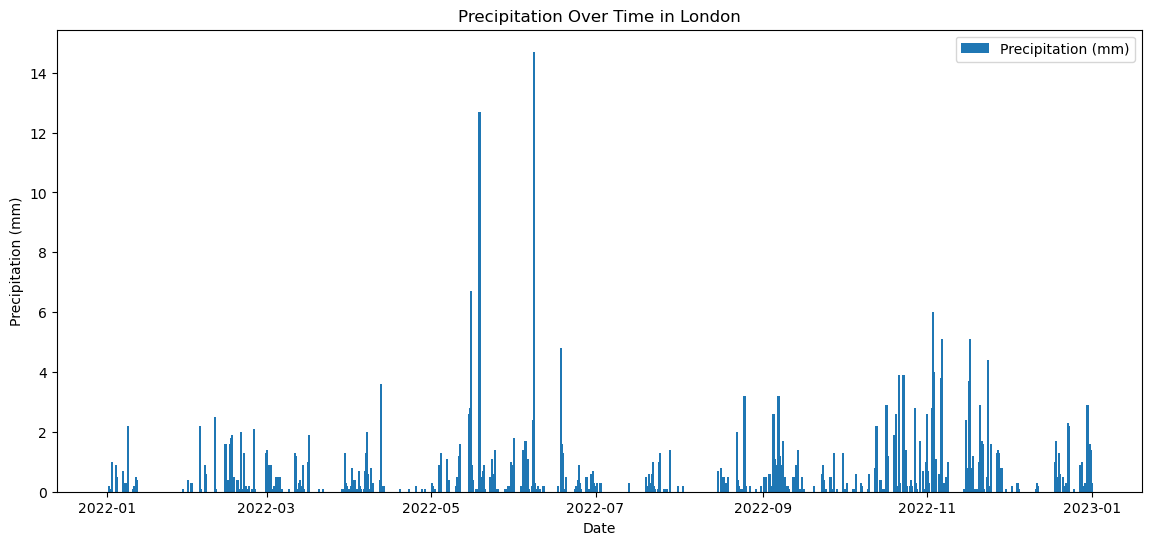

In [151]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df_2.index, df_2['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in London')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()

In [153]:
# Step 6: Correlation Analysis

# Calculate correlation between temperature and humidity
correlation_2 = df_2['temperature_2m'].corr(df_2['relativehumidity_2m'])
print(f'Correlation between Temperature and Relative Humidity: {correlation_2:.2f}')

Correlation between Temperature and Relative Humidity: -0.66


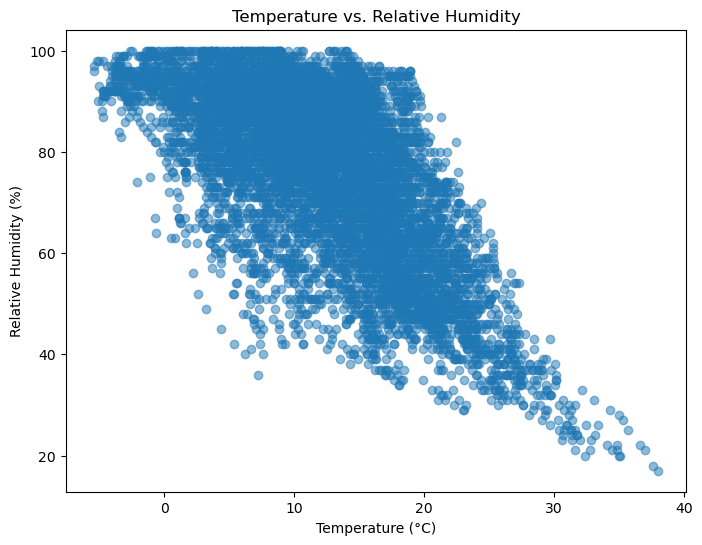

In [155]:
# Scatter Plot of Temperature vs. Relative Humidity

plt.figure(figsize=(8,6))
plt.scatter(df_2['temperature_2m'], df_2['relativehumidity_2m'], alpha=0.5)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


In [157]:
# Step 7: Resample Data to Daily Averages

weekly_avg = df_2.resample('W').mean()
weekly_avg.head()

,temperature_2m,relativehumidity_2m,precipitation
time,,,
2022-01-02,11.993750,86.458333,0.045833
2022-01-09,4.238690,86.089286,0.076786
2022-01-16,3.532143,94.696429,0.018452
2022-01-23,2.617262,89.416667,0.000000
2022-01-30,4.838690,86.476190,0.002381


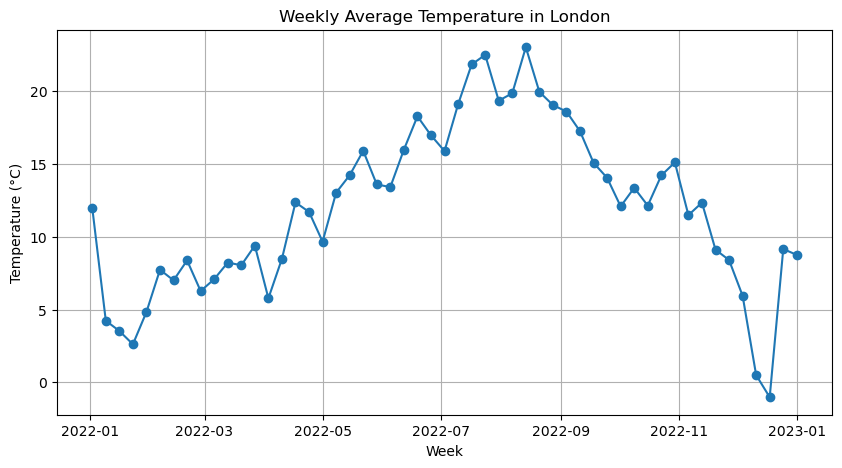

In [159]:
# Plot Daily Average Temperature

plt.figure(figsize=(10,5))
plt.plot(weekly_avg.index, weekly_avg['temperature_2m'], marker='o')
plt.title('Weekly Average Temperature in London')
plt.xlabel('Week')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

In [181]:
# Step 8: Compare with Another Location (Seattle)

# Coordinates for Seattle
latitude_sea = 47.6062
longitude_sea = -122.3321

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params_sea = {
    'latitude': latitude_sea,
    'longitude': longitude_sea,
    'start_date': start_date_2,
    'end_date': end_date_2,
    'hourly': ','.join(hourly_variables_2)
}

response_sea = requests.get(base_url, params=params_sea)

# Check if the request was successful

if response_sea.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response_sea.status_code}')


Data fetched successfully!


In [183]:
# Load and clean Seattle data
data_sea = response_sea.json()
hourly_data_sea = data_sea['hourly']
df_sea = pd.DataFrame(hourly_data_sea)

df_sea['time'] = pd.to_datetime(df_sea['time'])
df_sea.set_index('time', inplace=True)
df_sea.ffill(inplace=True)

In [187]:
# Resample Seattle Data to Daily Averages

weekly_avg_sea = df_sea.resample('W').mean()

In [199]:
# Combine DataFrames for Comparison

combined_weekly_precip = pd.DataFrame({
    'London': weekly_avg['precipitation'],
    'Seattle': weekly_avg_sea['precipitation']
})

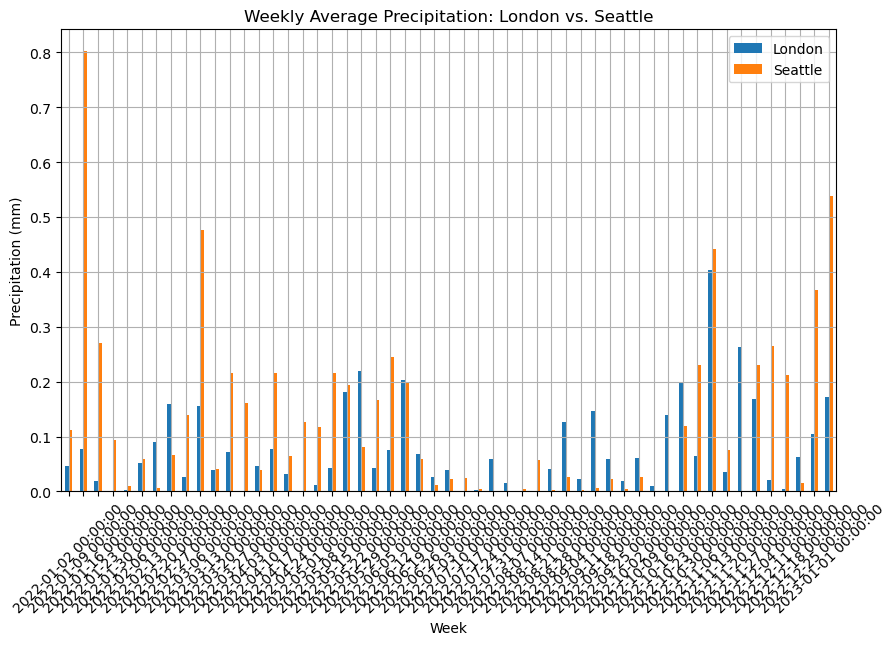

In [201]:
# Plot Comparison of Weekly Average Temperature

combined_weekly_precip.plot(kind='bar', figsize=(10,6))
plt.title('Weekly Average Precipitation: London vs. Seattle')
plt.xlabel('Week')
plt.ylabel('Precipitation (mm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [205]:
#Step 9: Advanced Analysis - Temperature Difference

# Calculate Precipitation Difference
combined_weekly_precip['Precip Difference'] = combined_weekly_precip['Seattle'] - combined_weekly_precip['London']
combined_weekly_precip.head()

,London,Seattle,Precip Difference
time,,,
2022-01-02,0.045833,0.112500,0.066667
2022-01-09,0.076786,0.801786,0.725000
2022-01-16,0.018452,0.270833,0.252381
2022-01-23,0.000000,0.093452,0.093452
2022-01-30,0.002381,0.010119,0.007738


In [ ]:
We can clearly see based on the graph that Seattle had more rainfall (precipitation) than London for every week of the year in 2022. Looking at the difference in the values also proves that. All of the differences are positive when we subtract the London values from the Seattle values. 